In [16]:
import pandas as pd
import numpy as np
import xarray as xr
import copy
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_5_1951_2020_v5-0_de.nc#mode=bytes', chunks={"time": 10, "x": 20, "y": 20})

In [18]:
def plot_averages(dataset, variable):
    fig, ax = plt.subplots(figsize = (10, 5))
    means = dataset.groupby('time.dayofyear').mean(dim=['time', 'x', 'y'])[variable].values
    stds = dataset.groupby('time.dayofyear').std(dim=['time']).mean(dim = ['x', 'y'])[variable].values
    ax.plot(pd.date_range('0000-01-01', '0000-12-31'), means)
    ax.fill_between(pd.date_range('0000-01-01', '0000-12-31'), means - stds, means + stds)

KeyboardInterrupt: 

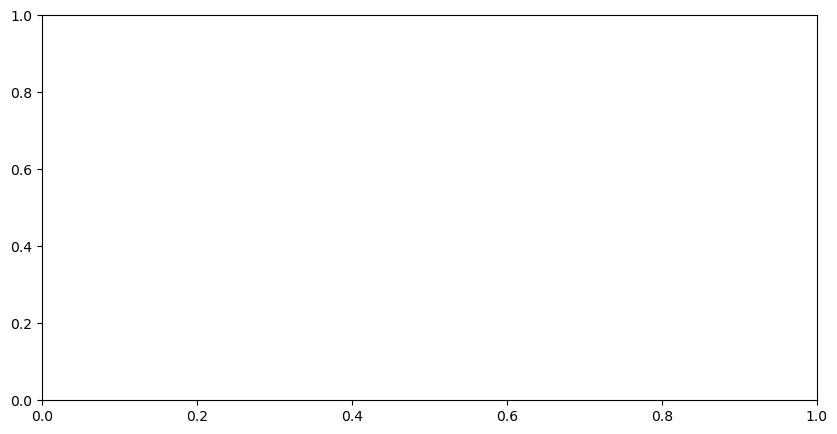

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
means = ds.groupby('time.dayofyear').mean(dim=['time', 'x', 'y'])[variable]


In [ ]:
stds = ds.groupby('time.dayofyear').std(dim=['time']).mean(dim = ['x', 'y'])[variable].values
ax.plot(pd.date_range('0000-01-01', '0000-12-31'), means)
ax.fill_between(pd.date_range('0000-01-01', '0000-12-31'), means - stds, means + stds)

In [19]:
plot_averages(ds, 'tasmax')

In [10]:
ds.groupby('time.dayofyear').mean(dim='time')

<xarray.Dataset>
Dimensions:             (y: 220, x: 240, dayofyear: 366, bnds: 2)
Coordinates:
    lon                 (y, x) float64 dask.array<chunksize=(20, 20), meta=np.ndarray>
    lat                 (y, x) float64 dask.array<chunksize=(20, 20), meta=np.ndarray>
  * x                   (x) float32 3.502e+06 3.508e+06 ... 4.692e+06 4.698e+06
  * y                   (y) float32 2.102e+06 2.108e+06 ... 3.192e+06 3.198e+06
  * dayofyear           (dayofyear) int64 1 2 3 4 5 6 ... 362 363 364 365 366
Dimensions without coordinates: bnds
Data variables:
    x_bnds              (dayofyear, x, bnds) float32 dask.array<chunksize=(1, 20, 2), meta=np.ndarray>
    y_bnds              (dayofyear, y, bnds) float32 dask.array<chunksize=(1, 20, 2), meta=np.ndarray>
    crs_HYRAS           (dayofyear) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    tasmax              (dayofyear, y, x) float32 dask.array<chunksize=(1, 20, 20), meta=np.ndarray>
    number_of_stations  (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/19)
    source:                 surface observations
    Conventions:            CF-1.8
    realization:            v5.0
    project_id:             HYRAS
    input_data_status:      non-realtime
    level_type:             surface
    ...                     ...
    horizontal_resolution:  5 km
    title:                  gridded_temperature_dataset_(HYRAS-DE TMAX)
    institution:            Deutscher Wetterdienst (DWD)
    creation_date:          created at 2022-12-04 19:18:53
    filename:               tasmax_hyras_5_1951_2020_v5-0_de.nc
    unique_dataset_id:      DWD_HYRAS_DE_tasmax_v5.0_1951_2020_day_00638CF29D